In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import timeit
import seaborn as sns

Simulación estocastica con el algoritmo de Gilliespie
## A

In [2]:
i_max = 40000
n_max = 1000
kr = 1
kp= 50
gammap = 1/35
gammar= 1/6

In [3]:

t = np.zeros((i_max))
r = np.zeros((i_max))
p = np.zeros((i_max))
print(len(t))
print(len(r))


40000
40000


In [4]:
def gillespie(i_max,kr,kp,gammap,gammar):
  t = np.zeros((i_max))
  r = np.zeros((i_max))
  p = np.zeros((i_max))
  for i in range(i_max):
    s1= kr
    s2= gammar*r[i-1]
    s3= kp*r[i-1]
    s4= gammap*p[i-1]
    stot= s1+s2+s3+s4
    t[i]= t[i-1]+(1/stot)*np.log(1/random.random())
    q= random.random()
    if q< s1/stot:
      r[i]= r[i-1]+1
      p[i]= p[i-1]
    elif q< (s1+s2)/stot:
      r[i]= r[i-1]-1
      p[i]= p[i-1]
    elif q< (s1+s2+s3)/stot:
      r[i]= r[i-1]
      p[i]= p[i-1]+1
    else:
      r[i]= r[i-1]
      p[i]= p[i-1]-1
  return r,p,t

In [5]:
r1,p1,t1= gillespie(i_max,kr,kp,gammap,gammar)

Text(0, 0.5, 'Proteinas')

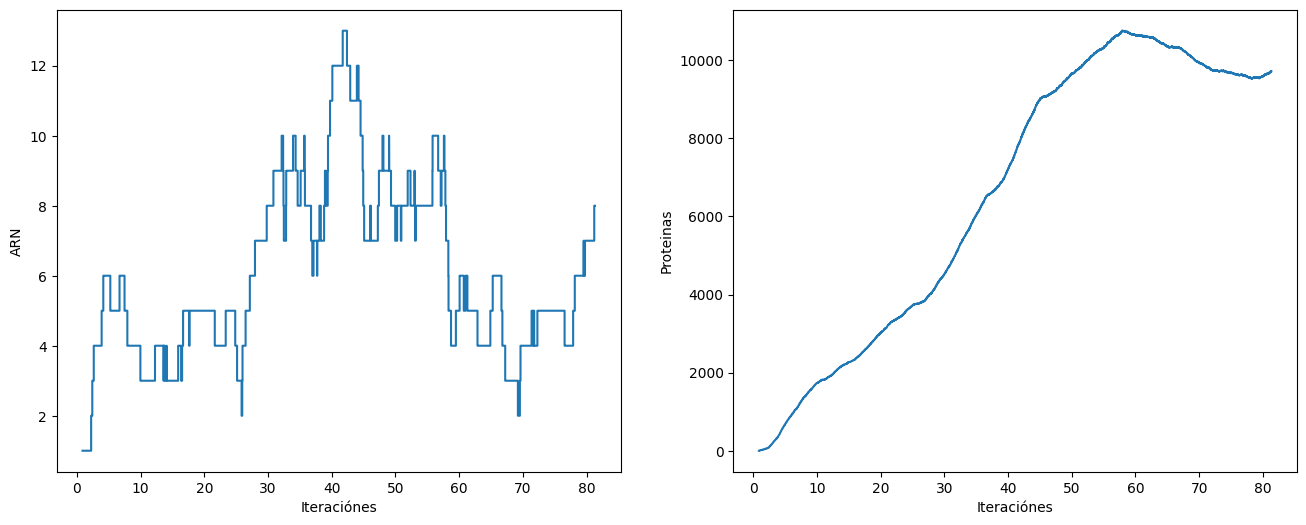

In [6]:
fig,ax= plt.subplots(1,2,figsize=(16,6))
ax[0].step(t1,r1)
ax[0].set_xlabel("Iteraciónes")
ax[0].set_ylabel("ARN")
ax[1].step(t1,p1)
ax[1].set_xlabel("Iteraciónes")
ax[1].set_ylabel("Proteinas")


#B

In [7]:

def poblacion(f,i_max,n_max,kr,kp,gammap,gammar):
  dt= 1
  tf= np.arange(0,i_max,dt)
  fig, ax= plt.subplots(1, 2, figsize=(16, 8))
  r0 = []
  p0 = []
  for n in range(1, n_max):
    r,p,t= f(i_max,kr,kp,gammap,gammar)
    r0.append(r)
    p0.append(p)
    ax[0].step(tf,r)
    ax[0].set_xlabel("Tiempo")
    ax[0].set_ylabel("ARN")
    ax[1].step(tf,p)
    ax[1].set_xlabel("Tiempo")
    ax[1].set_ylabel("ARN")
  plt.show()
  rn = np.vstack(r0)
  pn = np.vstack(p0)
  return rn,pn,tf

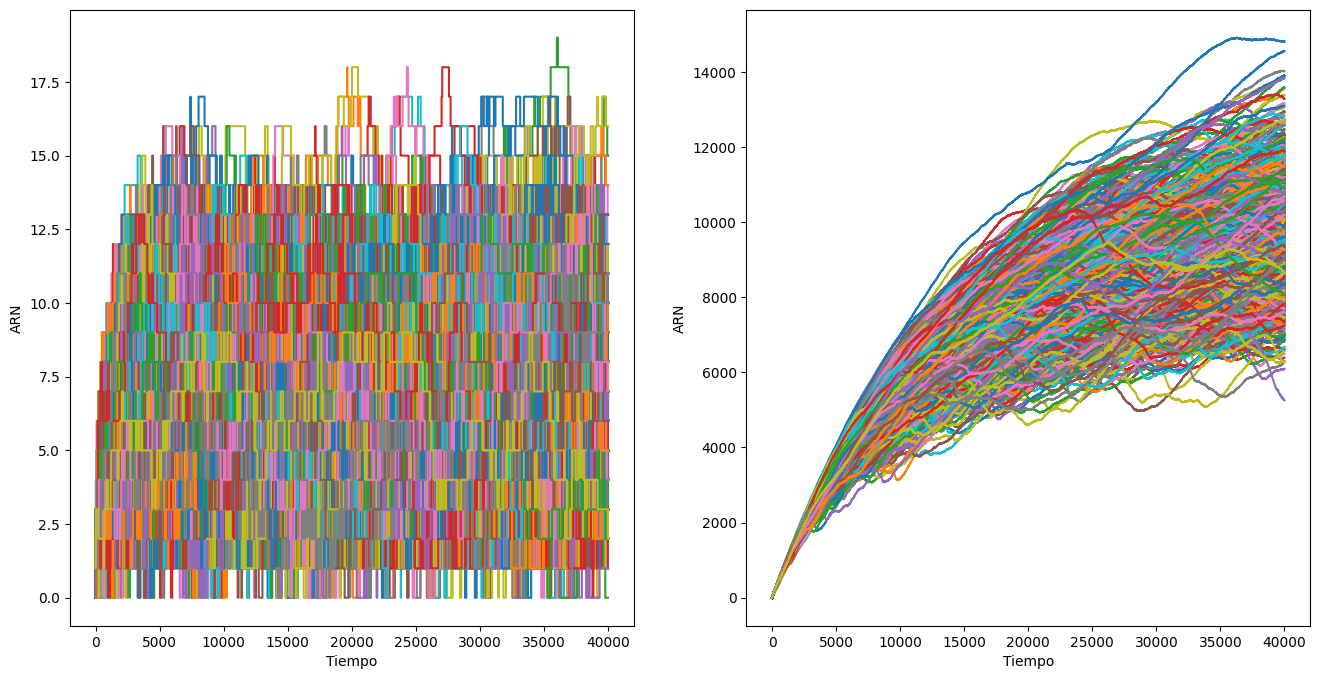

In [ ]:
rn,pn,tf=poblacion(gillespie,i_max,n_max,kr,kp,gammap,gammar)

Text(0, 0.5, 'Proteínas promedio')

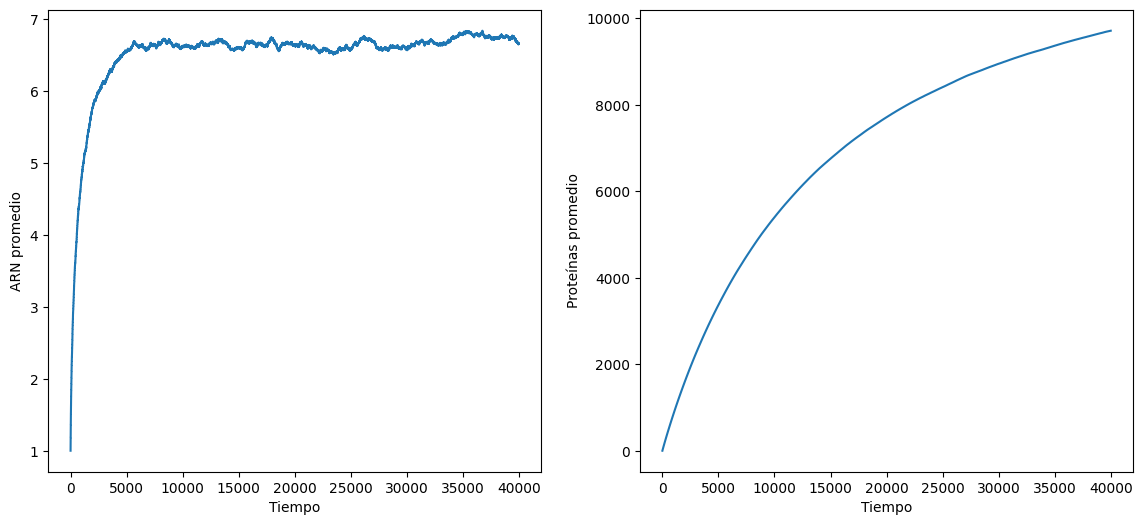

In [ ]:
# Promedio
p_p= np.mean(pn,axis=0)
p_r= np.mean(rn,axis=0)
fig, ax= plt.subplots(1, 2, figsize=(14, 6))
ax[0].step(tf,p_r)
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("ARN promedio")
ax[1].step(tf,p_p)
ax[1].set_xlabel("Tiempo")
ax[1].set_ylabel("Proteínas promedio")

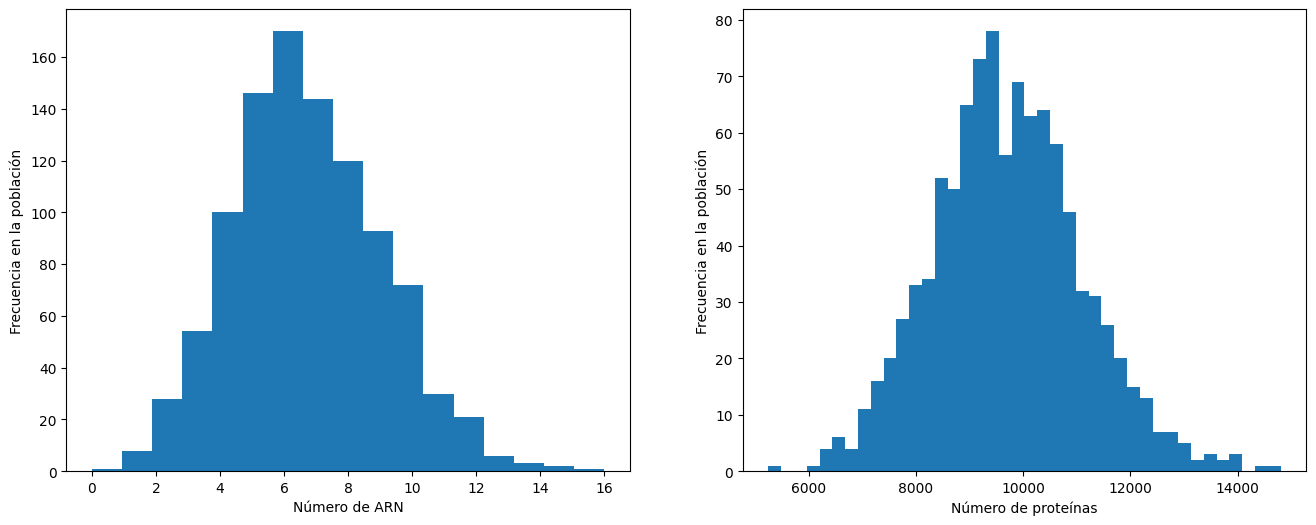

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(16, 6))
ax[0].hist(rn[:,39999],bins=17)
ax[0].set_xlabel("Número de ARN")
ax[0].set_ylabel("Frecuencia en la población")
ax[1].hist(pn[:,39999],bins=40)
ax[1].set_xlabel("Número de proteínas")
ax[1].set_ylabel("Frecuencia en la población")
plt.show()


In [ ]:
mean_r= np.mean(rn[:,39999])
mean_p= np.mean(pn[:,39999])
mean_r= np.mean(rn[:,39999])
mean_p= np.mean(pn[:,39999])
noise_r= np.sqrt(1/(mean_r))
noise_p= np.sqrt(1/(mean_p)+noise_r*(1/(1+gammar/gammap)))
print("Promedio ARN: " + str(mean_r) + "\nRuido ARN: " + str(noise_r))
print("Promedio proteinas:" + str(mean_p) + "\nRuido proteinas: " + str(noise_p))


Promedio ARN: 6.655655655655655
Ruido ARN: 0.3876185723332757
Promedio proteinas:9711.952952952954
Ruido proteinas: 0.2383854756992474


# C

In [ ]:
max= int(10/gammap)
n = 100
print(max)

350


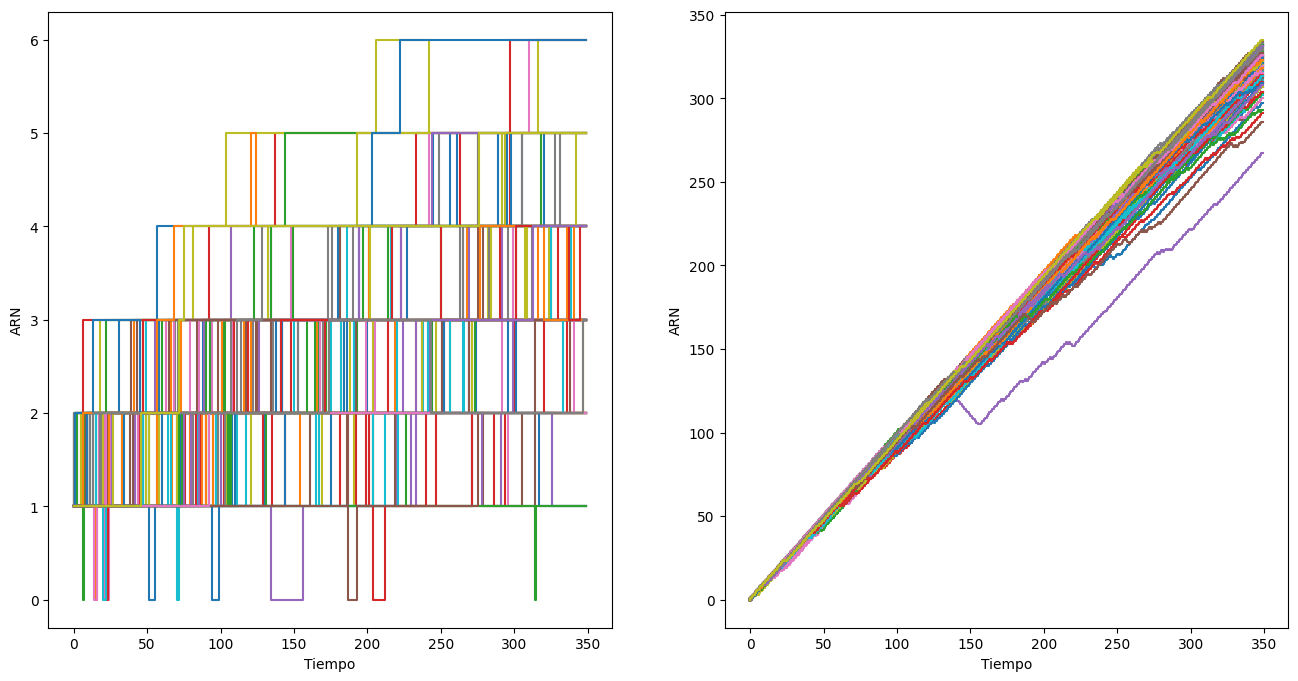

Tiempo de ejecución: 0.7682194389999495 segundos


In [ ]:
def funcion_llamado():
  poblacion(gillespie,max,n,kr,kp,gammap,gammar)


tiempo_total = timeit.timeit(funcion_llamado, number=1)
print(f"Tiempo de ejecución: {tiempo_total} segundos")
